# Practical Application III: Comparing Classifiers

**Overview**: Goal of this project is to compare the performance of four classifiers , namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  

### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.

### Business Problem

The increasingly vast number of marketing campaigns over time has reduced its effect on the general public. Businesses now invest on directed campaigns with a strict and rigorous selection of contacts. Also, pressure for a reduction in cost and time requires a  need for an improvement in efficiency: **lesser contacts should be done, but an approximately number  of successes (clients subscribing the deposit) should be kept**.
k
The business goal is to **find a model that can explain success of a contact**, i.e  if the client subscribes the deposit. Such model can increase campaign efficiency by identifying the main characteristics that affect success, helping in a better management of the available resources (e.g. human effort, phone calls, time) and selection of a high quality and affordable set of potential buying customers.estomers.

###  Data Overview

The data is related with direct marketing campaigns of a Portuguese banking institution. 17 Marketing campaigns were conducted. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

During these phone campaigns, an attractive long-term deposit application, with good interest rates, was offered. For each contact, a large number of attributes was and if there was a success (the target variable). For the whole database considered, there were 6499 successes (8% success rate).

#### Understanding the Features
| Variable Name   | Description                                                                                                                                                                                                                                                                                                                                                                                                        | Missing Values   |
|:----------------|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:-----------------|
| age             | nan                                                                                                                                                                                                                                                                                                                                                                                                                | no               |
| job             | type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')                                                                                                                                                                                                                                       | no               |
| marital         | marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)                                                                                                                                                                                                                                                                                                  | no               |
| education       | (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')                                                                                                                                                                                                                                                                                     | no               |
| default         | has credit in default?                                                                                                                                                                                                                                                                                                                                                                                             | no               |
| balance         | average yearly balance                                                                                                                                                                                                                                                                                                                                                                                             | no               |
| housing         | has housing loan?                                                                                                                                                                                                                                                                                                                                                                                                  | no               |
| loan            | has personal loan?                                                                                                                                                                                                                                                                                                                                                                                                 | no               |
| contact         | contact communication type (categorical: 'cellular','telephone')                                                                                                                                                                                                                                                                                                                                                   | yes              |
| day_of_week     | last contact day of the week                                                                                                                                                                                                                                                                                                                                                                                       | no               |
| month           | last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')                                                                                                                                                                                                                                                                                                                                   | no               |
| duration        | last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. | no               |
| campaign        | number of contacts performed during this campaign and for this client (numeric, includes last contact)                                                                                                                                                                                                                                                                                                             | no               |
| pdays           | number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)                                                                                                                                                                                                                                                                 | yes              |
| previous        | number of contacts performed before this campaign and for this client                                                                                                                                                                                                                                                                                                                                              | no               |
| poutcome        | outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')                                                                                                                                                                                                                                                                                                                        | yes              |
| y               | has the client subscribed a term deposit?                                                                                                                                                                                                                                                                                                                                                          no             | nan              |
d a term deposit?

 term deposit?		
d a term deposit?erm deposit?
```


### Read in the Data

In [17]:
import pandas as pd

# Load the dataset
file_path = 'data/bank-full.csv'
data = pd.read_csv(file_path, sep=';')

# Display the first few rows of the dataset
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


(   age           job  marital  education default  balance housing loan  \
 0   58    management  married   tertiary      no     2143     yes   no   
 1   44    technician   single  secondary      no       29     yes   no   
 2   33  entrepreneur  married  secondary      no        2     yes  yes   
 3   47   blue-collar  married    unknown      no     1506     yes   no   
 4   33       unknown   single    unknown      no        1      no   no   
 
    contact  day month  duration  campaign  pdays  previous poutcome   y  
 0  unknown    5   may       261         1     -1         0  unknown  no  
 1  unknown    5   may       151         1     -1         0  unknown  no  
 2  unknown    5   may        76         1     -1         0  unknown  no  
 3  unknown    5   may        92         1     -1         0  unknown  no  
 4  unknown    5   may       198         1     -1         0  unknown  no  ,
 None)

#### Check for null values

In [21]:
if not data.isnull().any().any():
    print("The DataFrame has no null values.")
else:
    print("The DataFrame contains null values.")

The DataFrame has no null values.


Although there are no null values but 'contact', 'pdays' and 'poutcome' have unknown values. 'unknown' in these columns indicate contact was not contacted previously . Lets see number of unkowns in the data frame. unknown in pdays is -1

In [22]:
columns_to_check = ['contact', 'pdays', 'poutcome']  

for column in columns_to_check:
    print(f"Unique values and counts for column '{column}':")
    print(data[column].value_counts())
    print("\n")

Unique values and counts for column 'contact':
contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64


Unique values and counts for column 'pdays':
pdays
-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: count, Length: 559, dtype: int64


Unique values and counts for column 'poutcome':
poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64




seems like significant number of people were contacted for the first time . Lets split the dataframe based on 'first time contact' and 'previously contacted customers' and  **build two seperate models.**

###  Previously contacted customers.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Filter out rows where poutcome = 'unknown'
data_filtered = data[data['poutcome'] != 'unknown'].copy()

# Encode categorical variables
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan',
                       'contact', 'month', 'poutcome']
label_encoders = {}

for column in categorical_columns:
    le = LabelEncoder()
    data_filtered.loc[:, column] = le.fit_transform(data_filtered[column])
    label_encoders[column] = le

# Encode the target variable 'y'
le_y = LabelEncoder()
data_filtered['y'] = le_y.fit_transform(data_filtered['y'])

# Separate features (X) and target (y)
X = data_filtered.drop('y', axis=1)
y = data_filtered['y']

# Drop the 'duration' feature
X = X.drop(columns=['duration'])

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check if stratification is valid
print(y.value_counts())  # Ensure there are at least two classes

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Output shapes
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

y
0    6349
1    1903
Name: count, dtype: int64
(6601, 15) (1651, 15) (6601,) (1651,)


####  K Nearest Neighbor (Existing customer).

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid for KNN
param_grid = {'n_neighbors': list(range(1, 31))}

# Initialize KNN
knn = KNeighborsClassifier()

# Perform GridSearchCV to find the best k
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Extract the best k and corresponding score
best_k = grid_search.best_params_['n_neighbors']
best_knn_score = grid_search.best_score_

print(f"Best k: {best_k}")
print(f"Best ROC AUC score: {best_knn_score}")

Best k: 30
Best ROC AUC score: 0.8002297120912913


####  Logistic Regression ( Existing customer).

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid for Logistic Regression
param_grid_logistic = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l2'],             # L2 regularization (standard for Logistic Regression)
    'solver': ['lbfgs', 'liblinear']  # Solvers that support L2
}

# Initialize Logistic Regression
logistic = LogisticRegression(max_iter=1000, random_state=42)

# Perform GridSearchCV to find the best hyperparameters
grid_search_logistic = GridSearchCV(logistic, param_grid_logistic, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_logistic.fit(X_train, y_train)

# Extract the best parameters and corresponding score
best_logistic_params = grid_search_logistic.best_params_
best_logistic_score = grid_search_logistic.best_score_

print(f"Best Parameters: {best_logistic_params}")
print(f"Best ROC AUC Score: {best_logistic_score}")

Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Best ROC AUC Score: 0.7936955824566011


####  Decision Trees (Existing Customer).

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid for Decision Tree
param_grid_tree = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)

# Perform GridSearchCV to find the best hyperparameters
grid_search_tree = GridSearchCV(decision_tree, param_grid_tree, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_tree.fit(X_train, y_train)

# Extract the best parameters and corresponding score
best_tree_params = grid_search_tree.best_params_
best_tree_score = grid_search_tree.best_score_

print(f"Best Parameters: {best_tree_params}")
print(f"Best ROC AUC Score: {best_tree_score}")


Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best ROC AUC Score: 0.8001095245812868


####  Support Vector Machines.

In [22]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],           # Regularization parameter
    'kernel': ['linear', 'rbf'],      # Linear and RBF kernels
    'gamma': ['scale', 'auto']        # Kernel coefficient for RBF
}

# Initialize SVM
svm = SVC(probability=True, random_state=42)

# Perform GridSearchCV to find the best hyperparameters
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_svm.fit(X_train, y_train)

# Extract the best parameters and corresponding score
best_svm_params = grid_search_svm.best_params_
best_svm_score = grid_search_svm.best_score_

print(f"Best Parameters for SVM: {best_svm_params}")
print(f"Best ROC AUC Score for SVM: {best_svm_score}")

Best Parameters for SVM: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Best ROC AUC Score for SVM: 0.7915886596491775


#####  Compare best parameters of all the models

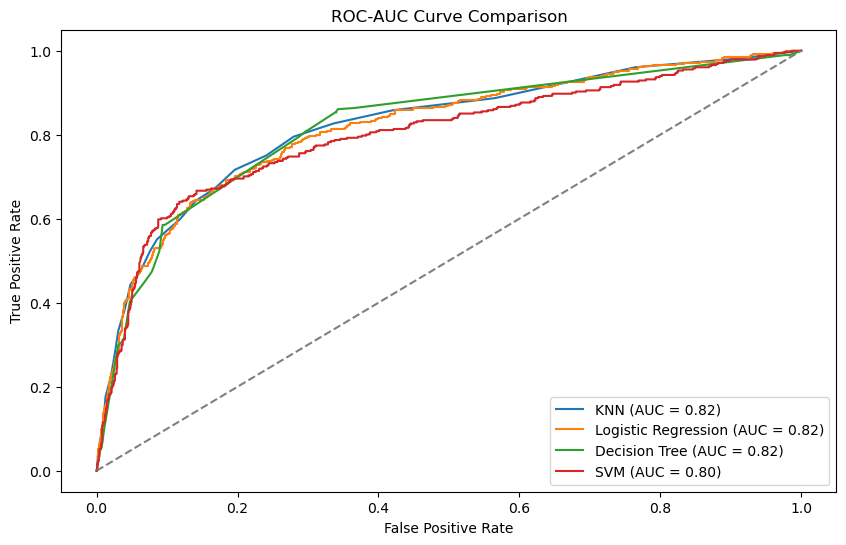

Model Performance Summary:
                 Model   ROC AUC  F1-Score
0                  KNN  0.821393  0.553191
1  Logistic Regression  0.817052  0.550489
2        Decision Tree  0.819775  0.543511
3                  SVM  0.799589  0.607670


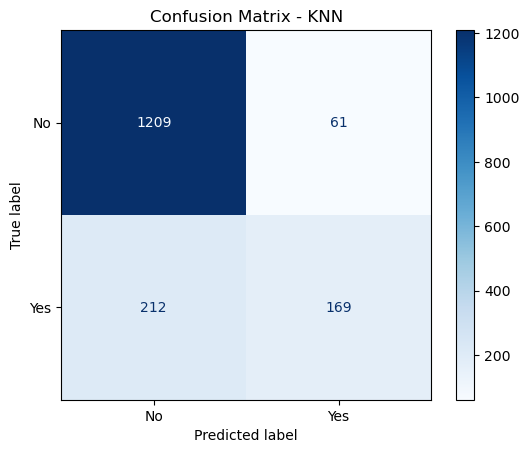

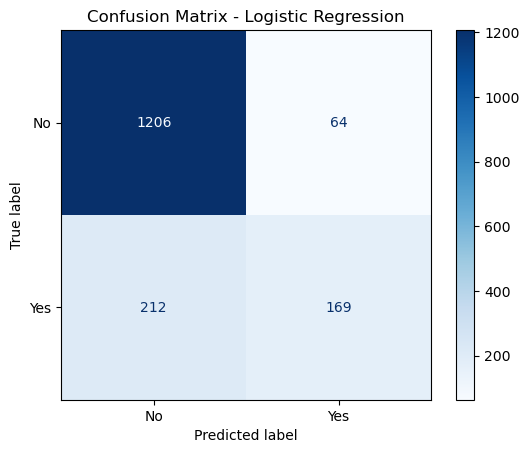

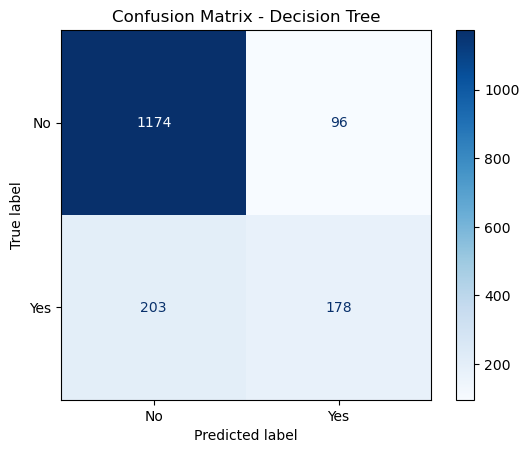

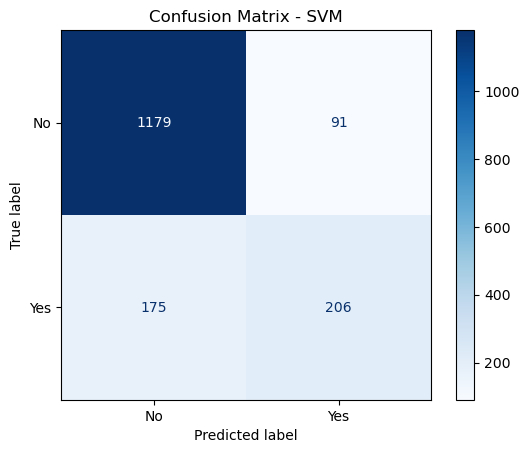

In [23]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd

# Define optimized models
optimized_models = {
    "KNN": KNeighborsClassifier(n_neighbors=best_k),
    "Logistic Regression": LogisticRegression(
        C=best_logistic_params['C'], 
        penalty=best_logistic_params['penalty'], 
        solver=best_logistic_params['solver'], 
        max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(
        max_depth=best_tree_params['max_depth'], 
        min_samples_split=best_tree_params['min_samples_split'], 
        min_samples_leaf=best_tree_params['min_samples_leaf'], 
        criterion=best_tree_params['criterion'], 
        random_state=42),
    "SVM": SVC(
        C=best_svm_params['C'], 
        kernel=best_svm_params['kernel'], 
        gamma=best_svm_params['gamma'], 
        probability=True, 
        random_state=42)
}

# Evaluate models
performance_results = []
plt.figure(figsize=(10, 6))

for name, model in optimized_models.items():
   
    X_train_2, X_test_2, y_train_2, y_test_2 = X_train, X_test, y_train, y_test
    
    # Train the model
    model.fit(X_train_2, y_train_2)
    # Predict probabilities or decision function
    y_prob = model.predict_proba(X_test_2)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test_2)
    y_pred = model.predict(X_test_2)
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test_2, y_prob)
    roc_auc = auc(fpr, tpr)
    # Compute classification metrics
    f1 = classification_report(y_test_2, y_pred, output_dict=True)['1']['f1-score']
    cm = confusion_matrix(y_test_2, y_pred)
    # Append performance metrics
    performance_results.append({
        "Model": name,
        "ROC AUC": roc_auc,
        "F1-Score": f1,
        "Confusion Matrix": cm
    })
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Plot diagonal
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve Comparison")
plt.legend(loc="lower right")
plt.show()

# Create a summary table for all models
results_df = pd.DataFrame(performance_results).drop(columns=["Confusion Matrix"])
print("Model Performance Summary:")
print(results_df)

# Visualize confusion matrices
for result in performance_results:
    cm = result["Confusion Matrix"]
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - {result['Model']}")
    plt.show()


#####  Feature importance for Decision Tree (Existing Customers)

Top Features for Decision Tree:
     Feature  Importance
14  poutcome    0.631014
6    housing    0.147916
12     pdays    0.122559
7       loan    0.021541
5    balance    0.019345
10     month    0.015879
9        day    0.014739
11  campaign    0.011194
1        job    0.006343
13  previous    0.005357


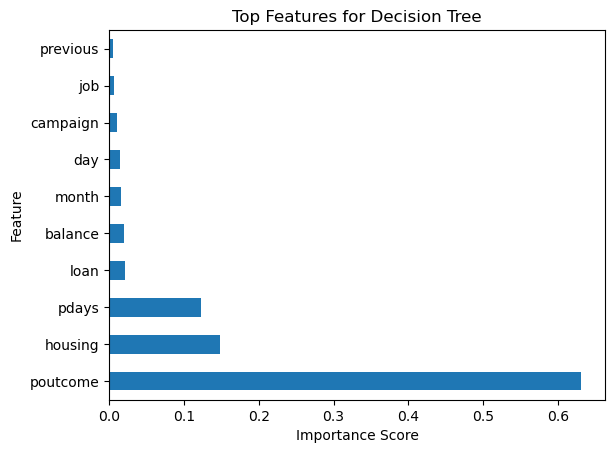

In [24]:
# Manually define feature names
feature_names = [
    'age', 'job', 'marital', 'education', 'default',
    'balance', 'housing', 'loan', 'contact', 'day',
    'month', 'campaign', 'pdays', 'previous','poutcome'
]  

# Train the Decision Tree
decision_tree_model = DecisionTreeClassifier(
    max_depth=best_tree_params['max_depth'], 
    min_samples_split=best_tree_params['min_samples_split'], 
    min_samples_leaf=best_tree_params['min_samples_leaf'], 
    criterion=best_tree_params['criterion'], 
    random_state=42
)
decision_tree_model.fit(X_train, y_train)

# Extract feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,  # Use the manually defined feature names
    'Importance': decision_tree_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display the top features
print("Top Features for Decision Tree:")
print(feature_importance_df.head(10))

# Plot the top feature importances
feature_importance_df.head(10).plot(kind='barh', x='Feature', y='Importance', legend=False)
plt.title('Top Features for Decision Tree')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


###  New customers.
Now lets build model for new customers . Here we take only rows that have **poutcome = 'unknown'**. We will also drop **'poutcode'** and **'pdays'* columns .

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Filter to include only rows where poutcome = 'unknown'
data_filtered = data[data['poutcome'] == 'unknown'].copy()

# Encode categorical variables
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month']
label_encoders = {}

for column in categorical_columns:
    le = LabelEncoder()
    data_filtered[column] = le.fit_transform(data_filtered[column])
    label_encoders[column] = le

# Encode the target variable 'y'
le_y = LabelEncoder()
data_filtered['y'] = le_y.fit_transform(data_filtered['y'])

# Separate features (X) and target (y)
X = data_filtered.drop('y', axis=1)
y = data_filtered['y']  # Define y here after encoding

# Drop the 'duration', 'poutcome', and 'pdays' features
X = X.drop(columns=['duration', 'poutcome', 'pdays'])

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check if stratification is valid
print(y.value_counts())  # Ensure there are at least two classes

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Output shapes
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


y
0    33573
1     3386
Name: count, dtype: int64
(29567, 13) (7392, 13) (29567,) (7392,)


####  K Nearest Neighbor (new Customer)

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid for KNN
param_grid = {'n_neighbors': list(range(1, 31))}

# Initialize KNN
knn = KNeighborsClassifier()

# Perform GridSearchCV to find the best k
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Extract the best k and corresponding score
best_k = grid_search.best_params_['n_neighbors']
best_knn_score = grid_search.best_score_

print(f"Best k: {best_k}")
print(f"Best ROC AUC score: {best_knn_score}")

Best k: 30
Best ROC AUC score: 0.6711193198929899


####  Logistic Regression ( new customer).

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid for Logistic Regression
param_grid_logistic = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l2'],             # L2 regularization (standard for Logistic Regression)
    'solver': ['lbfgs', 'liblinear']  # Solvers that support L2
}

# Initialize Logistic Regression
logistic = LogisticRegression(max_iter=1000, random_state=42)

# Perform GridSearchCV to find the best hyperparameters
grid_search_logistic = GridSearchCV(logistic, param_grid_logistic, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_logistic.fit(X_train, y_train)

# Extract the best parameters and corresponding score
best_logistic_params = grid_search_logistic.best_params_
best_logistic_score = grid_search_logistic.best_score_

print(f"Best Parameters: {best_logistic_params}")
print(f"Best ROC AUC Score: {best_logistic_score}")

Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Best ROC AUC Score: 0.6860148299744296


####  Decision Trees (new Customer).

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid for Decision Tree
param_grid_tree = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)

# Perform GridSearchCV to find the best hyperparameters
grid_search_tree = GridSearchCV(decision_tree, param_grid_tree, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_tree.fit(X_train, y_train)

# Extract the best parameters and corresponding score
best_tree_params = grid_search_tree.best_params_
best_tree_score = grid_search_tree.best_score_

print(f"Best Parameters: {best_tree_params}")
print(f"Best ROC AUC Score: {best_tree_score}")

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best ROC AUC Score: 0.7125258370737884


####  SVM (new Customer).
full file data is too large for SVM so using file with 10% data provided by same source. 

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the smaller dataset
file_path = 'bank.csv'  # Replace with the correct file path
data_small = pd.read_csv(file_path, sep=';')

# Filter to include only rows where poutcome = 'unknown'
data_filtered = data_small[data_small['poutcome'] == 'unknown'].copy()

# Encode categorical variables
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month']
label_encoders = {}

for column in categorical_columns:
    le = LabelEncoder()
    data_filtered[column] = le.fit_transform(data_filtered[column])
    label_encoders[column] = le

# Encode the target variable 'y'
le_y = LabelEncoder()
data_filtered['y'] = le_y.fit_transform(data_filtered['y'])

# Separate features (X) and target (y)
X_small = data_filtered.drop('y', axis=1)
y_small = data_filtered['y']  # Define y here after encoding

# Drop the 'duration', 'poutcome', and 'pdays' features
X_small = X_small.drop(columns=['duration', 'poutcome', 'pdays'])

# Scale numerical features
scaler = StandardScaler()
X_small_scaled = scaler.fit_transform(X_small)

# Check if stratification is valid
print(y_small.value_counts())  # Ensure there are at least two classes

# Split data into training and test sets (80% train, 20% test)
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(X_small_scaled, y_small, test_size=0.2, random_state=42, stratify=y_small)

# Output shapes
print(X_train_small.shape, X_test_small.shape, y_train_small.shape, y_test_small.shape)

y
0    3368
1     337
Name: count, dtype: int64
(2964, 13) (741, 13) (2964,) (741,)


#####  best parameters for SVM (new Customer).

In [3]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],           # Regularization parameter
    'kernel': ['linear', 'rbf'],      # Linear and RBF kernels
    'gamma': ['scale', 'auto']        # Kernel coefficient for RBF
}

# Initialize SVM
svm_small = SVC(probability=True, random_state=42)

# Perform GridSearchCV to find the best hyperparameters
grid_search_svm_small = GridSearchCV(svm_small, param_grid_svm, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_svm_small.fit(X_train_small, y_train_small)

# Extract the best parameters and corresponding score
best_svm_small_params = grid_search_svm_small.best_params_
best_svm_small_score = grid_search_svm_small.best_score_

print(f"Best Parameters for SVM: {best_svm_small_params}")
print(f"Best ROC AUC Score for SVM: {best_svm_small_score}")

Best Parameters for SVM: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best ROC AUC Score for SVM: 0.5965390061247735


#####  Compare best parameters of all the models

C:\Users\himan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\himan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\himan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


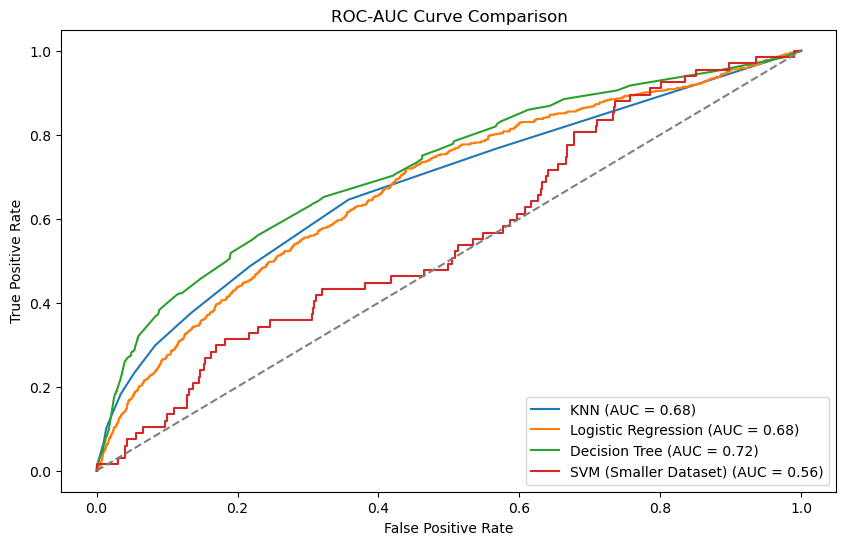

Model Performance Summary:
                   Model   ROC AUC  F1-Score
0                    KNN  0.678261  0.005874
1    Logistic Regression  0.676134  0.000000
2          Decision Tree  0.720967  0.140980
3  SVM (Smaller Dataset)  0.560122  0.028571


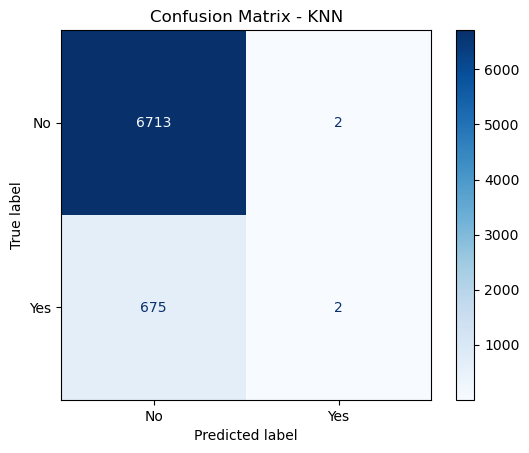

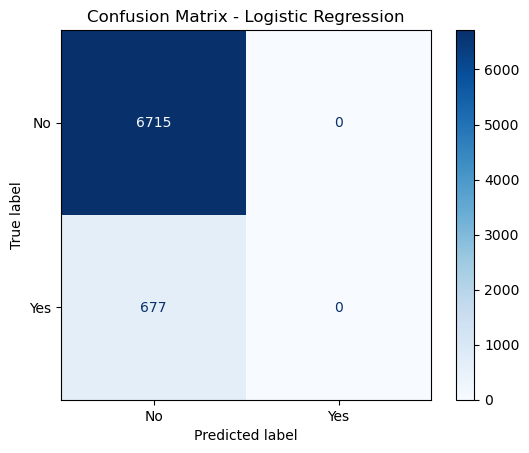

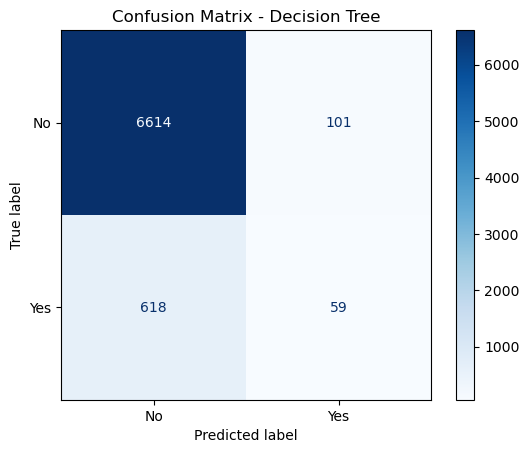

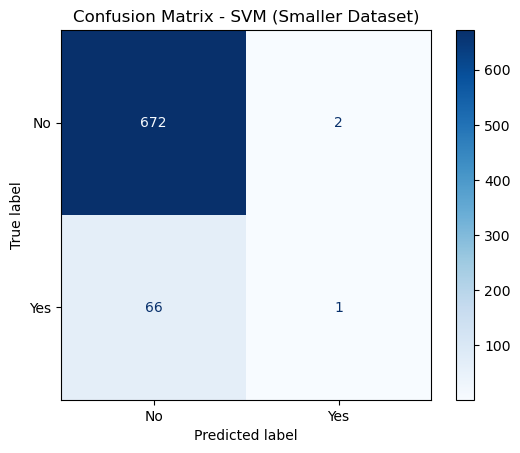

In [15]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd

# Define optimized models
optimized_models = {
    "KNN": KNeighborsClassifier(n_neighbors=best_k),
    "Logistic Regression": LogisticRegression(
        C=best_logistic_params['C'], 
        penalty=best_logistic_params['penalty'], 
        solver=best_logistic_params['solver'], 
        max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(
        max_depth=best_tree_params['max_depth'], 
        min_samples_split=best_tree_params['min_samples_split'], 
        min_samples_leaf=best_tree_params['min_samples_leaf'], 
        criterion=best_tree_params['criterion'], 
        random_state=42),
    "SVM (Smaller Dataset)": SVC(
        C=best_svm_small_params['C'], 
        kernel=best_svm_small_params['kernel'], 
        gamma=best_svm_small_params['gamma'], 
        probability=True, 
        random_state=42)
}

# Evaluate models
performance_results = []
plt.figure(figsize=(10, 6))

for name, model in optimized_models.items():
    # Select dataset based on model
    if name == "SVM (Smaller Dataset)":
        X_train_2, X_test_2, y_train_2, y_test_2 = X_train_small, X_test_small, y_train_small, y_test_small
    else:
        X_train_2, X_test_2, y_train_2, y_test_2 = X_train, X_test, y_train, y_test
    
    # Train the model
    model.fit(X_train_2, y_train_2)
    # Predict probabilities or decision function
    y_prob = model.predict_proba(X_test_2)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test_2)
    y_pred = model.predict(X_test_2)
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test_2, y_prob)
    roc_auc = auc(fpr, tpr)
    # Compute classification metrics
    f1 = classification_report(y_test_2, y_pred, output_dict=True)['1']['f1-score']
    cm = confusion_matrix(y_test_2, y_pred)
    # Append performance metrics
    performance_results.append({
        "Model": name,
        "ROC AUC": roc_auc,
        "F1-Score": f1,
        "Confusion Matrix": cm
    })
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Plot diagonal
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve Comparison")
plt.legend(loc="lower right")
plt.show()

# Create a summary table for all models
results_df = pd.DataFrame(performance_results).drop(columns=["Confusion Matrix"])
print("Model Performance Summary:")
print(results_df)

# Visualize confusion matrices
for result in performance_results:
    cm = result["Confusion Matrix"]
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - {result['Model']}")
    plt.show()

#####  Feature importance for Decision Tree (New Customers)

Top Features for Decision Tree:
      Feature  Importance
10      month    0.312518
0         age    0.186984
9         day    0.142783
5     balance    0.099460
8     contact    0.093692
6     housing    0.091435
2     marital    0.021355
3   education    0.015577
11   campaign    0.014890
1         job    0.011704


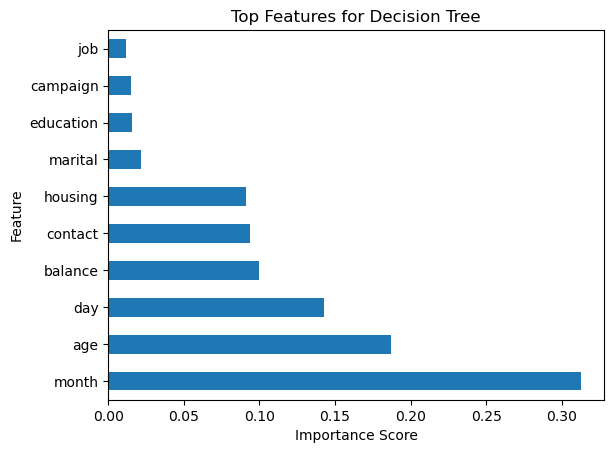

In [16]:
# Manually define feature names
feature_names = [
    'age', 'job', 'marital', 'education', 'default',
    'balance', 'housing', 'loan', 'contact', 'day',
    'month', 'campaign', 'previous'
]  

# Train the Decision Tree
decision_tree_model = DecisionTreeClassifier(
    max_depth=best_tree_params['max_depth'], 
    min_samples_split=best_tree_params['min_samples_split'], 
    min_samples_leaf=best_tree_params['min_samples_leaf'], 
    criterion=best_tree_params['criterion'], 
    random_state=42
)
decision_tree_model.fit(X_train, y_train)

# Extract feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,  # Use the manually defined feature names
    'Importance': decision_tree_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display the top features
print("Top Features for Decision Tree:")
print(feature_importance_df.head(10))

# Plot the top feature importances
feature_importance_df.head(10).plot(kind='barh', x='Feature', y='Importance', legend=False)
plt.title('Top Features for Decision Tree')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


### Conclusion

Two seperate models where build . One for new customers amd other for Existing customers. 

For **new customers** decision Tree seem to be performing the best with ROC-AUC of .72 . 
best parameters for Decision Tree (New Customers) - Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}
Top features - Month, Age, day, balance.

For **existing Customers** KNN, Decision Tree and Logistic Regression had almos same ROC-AUC of .82. But since we are using Decision tree for New csutomers we can recomend the same for existing customers. 
Best parameters for Decision Tree - Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}
Top features - Poutcome, Housing, pdays

For new customers which month customer is contacted is most influencial factor.

For existing customer what was the outcome of previous contact is most influencial factor.